In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
from bs4 import BeautifulSoup
import requests
import pandas as pd
from homeharvest import scrape_property
from datetime import datetime
import time
import json
import numpy
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

for dirname, _, filenames in os.walk("./"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./Chicago_HomeHarvest_2025.csv
./Project_2.ipynb
./.ipynb_checkpoints/Project_2-checkpoint.ipynb
./.ipynb_checkpoints/Chicago_HomeHarvest_2025-checkpoint.csv


# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

In [15]:
#Scrape for housing data in Chicago, Illinois and identify trends using machine learning algorithms

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

In [52]:
#Used Home Harvest to scrape the housing data for Chicago
# time = datetime.now().strftime("%Y%m%d_%H%M%S")
# filename = f"Chicago_HomeHarvest_{time}.csv"

# properties = scrape_property(location="Chicago, IL", listing_type="sold", past_days = 200,
#     extra_property_data=True) 

# print(f"Number of properties: {len(properties)}")
# properties.to_csv(filename, index=False)
# print(properties.head())

#Then used pandas to read it
data = pd.read_csv("Chicago_HomeHarvest_2025.csv")
data.head()

,property_url,property_id,listing_id,permalink,mls,mls_id,status,mls_status,text,style,...,builder_id,builder_name,office_id,office_mls_set,office_name,office_email,office_phones,nearby_schools,primary_photo,alt_photos
0,https://www.realtor.com/realestateandhomes-det...,8466932468,2.984323e+09,545-N-Dearborn-St-Apt-910_Chicago_IL_60654_M84...,CHIL,12421436.0,SOLD,Sold,"Rarely available 1-bed, 1-bath corner unit wit...",CONDOS,...,NaN,NaN,446831.0,O-CHIL-16379,@properties Christie's International Real Estate,jaynecocoran@atproperties.com,"[{'number': '3122540200', 'type': 'Office', 'p...","Il Dept Of Chldrn And Family Svcs, Chicago Pub...",https://ap.rdcpix.com/3e91fc48313651ba6bc4e31d...,https://ap.rdcpix.com/3e91fc48313651ba6bc4e31d...
1,https://www.realtor.com/realestateandhomes-det...,8991099778,2.984985e+09,933-W-Van-Buren-St-Apt-910_Chicago_IL_60607_M8...,CHIL,12423814.0,SOLD,Sold,"Welcome to this move-in ready, 2 bedroom/2 bat...",CONDOS,...,NaN,NaN,446831.0,O-CHIL-16379,@properties Christie's International Real Estate,jaynecocoran@atproperties.com,"[{'number': '3122540200', 'type': 'Office', 'p...",Chicago Public Schools,https://ap.rdcpix.com/80412d5d99883413ac8ae9ab...,https://ap.rdcpix.com/80412d5d99883413ac8ae9ab...
2,https://www.realtor.com/realestateandhomes-det...,7406824871,2.982854e+09,6005-N-Canfield-Ave_Chicago_IL_60631_M74068-24871,CHIL,12387302.0,SOLD,Sold,"Welcome home to a solid, all brick raised ranc...",SINGLE_FAMILY,...,NaN,NaN,NaN,O-CHIL-28406,Peter Drossos Real Estate,NaN,"[{'number': '(773) 593-5626', 'type': 'Mobile'...",Region 05 North Cook Intermediate Service Cent...,https://ap.rdcpix.com/f90ebc293d8c08455ac62406...,https://ap.rdcpix.com/f90ebc293d8c08455ac62406...
3,https://www.realtor.com/realestateandhomes-det...,7426501379,2.985117e+09,1610-W-Fullerton-Ave-Unit-210_Chicago_IL_60614...,CHIL,12439722.0,SOLD,Sold,"Discover the perfect blend of style, comfort, ...",CONDOS,...,NaN,NaN,1948102.0,O-CHIL-85774,@properties East Lincoln Park,melodytorrens@atproperties.com,"[{'number': '7734720200', 'type': 'Office', 'p...",Chicago Public Schools,https://ap.rdcpix.com/445877702e5a5435fe520229...,https://ap.rdcpix.com/445877702e5a5435fe520229...
4,https://www.realtor.com/realestateandhomes-det...,7317660066,2.983305e+09,4250-N-Marine-Dr-Apt-2105_Chicago_IL_60613_M73...,CHIL,12392775.0,SOLD,Sold,"Looking for a home with a captivating, unobstr...",CONDOS,...,NaN,NaN,4298235.0,O-CHIL-87738,Keller Williams ONEChicago,NaN,"[{'number': '3122162422', 'type': 'Office', 'p...",Chicago Public Schools,https://ap.rdcpix.com/25e83ee41c2b4df13b3d7f13...,https://ap.rdcpix.com/25e83ee41c2b4df13b3d7f13...


# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

New Houses Less than $1 Million 0.011112384007331883
New Houses $1 Million or More 0.0457516339869281
Two Or Less Beds Average Price 357690.37541862024
More than Two Beds Average Price 932102.9582989265


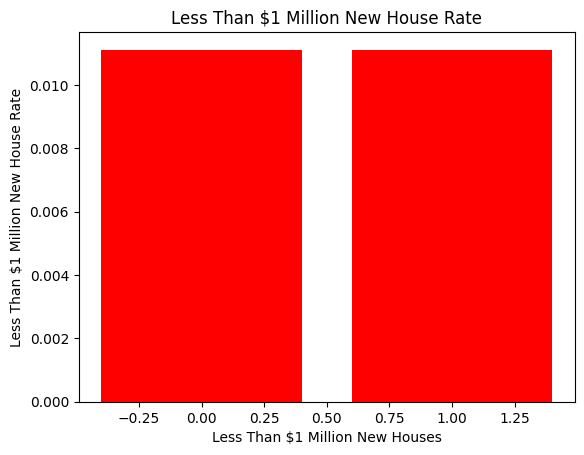

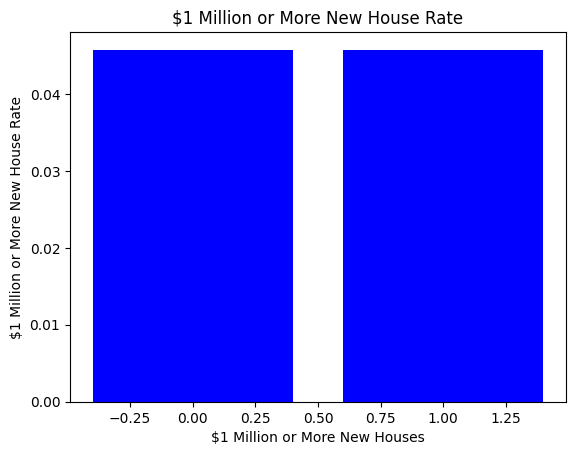

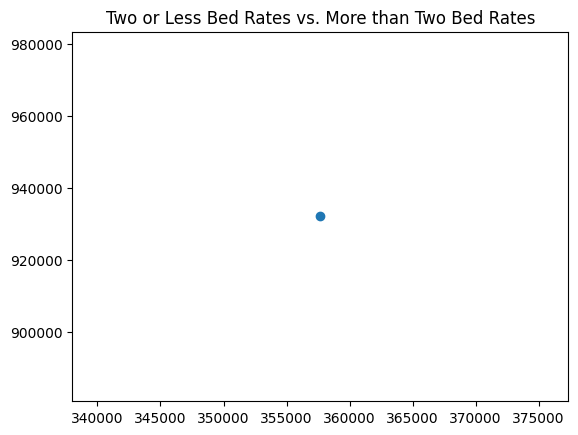

In [70]:
#Checking each category
lessThan1MilHouses = data.loc[data.sold_price < 1000000]['new_construction']
lessThan1MilHousesRate = sum(lessThan1MilHouses)/len(lessThan1MilHouses)
print("New Houses Less than $1 Million", lessThan1MilHousesRate)

houseInMillions = data.loc[data.sold_price >= 1000000]['new_construction']
houseInMillionsRate = sum(houseInMillions)/len(houseInMillions)
print("New Houses $1 Million or More", houseInMillionsRate)

cheapHouses = data.loc[data.sold_price <= 250000]
expensiveHouses = data.loc[data.sold_price > 250000]

twoOrLessBeds = data.loc[data.beds < 3]['sold_price']
twoOrLessBedRates = sum(twoOrLessBeds)/len(twoOrLessBeds)
print("Two Or Less Beds Average Price", twoOrLessBedRates)
moreThanTwoBeds = data.loc[data.beds > 3]['sold_price']
moreThanTwoBedRates = sum(moreThanTwoBeds)/len(moreThanTwoBeds)
print("More than Two Beds Average Price", moreThanTwoBedRates)

plt.bar(lessThan1MilHouses, lessThan1MilHousesRate, color = 'red')
plt.title('Less Than $1 Million New House Rate')
plt.xlabel('Less Than $1 Million New Houses')
plt.ylabel('Less Than $1 Million New House Rate')
plt.show()

plt.bar(houseInMillions, houseInMillionsRate, color = 'blue')
plt.title('$1 Million or More New House Rate')
plt.xlabel('$1 Million or More New Houses')
plt.ylabel('$1 Million or More New House Rate')
plt.show() 

plt.scatter(twoOrLessBedRates, moreThanTwoBedRates)
plt.title("Two or Less Bed Rates vs. More than Two Bed Rates")
plt.xlabel('Average Price of Less than 3 Beds')
plt.ylabel('$Average Price of More than 2 Beds')
plt.show()
#There is very little data on new houses
#The number of beds looks more promising to see trends






# 4.Prepare the Data


Apply any data transformations and explain what and why


In [74]:
#Converts the data to variables for training 
#To check the new construction price trends
xPrices = data['sold_price'].values
yNewHouse = data['new_construction'].values


#Prepares variables for cheap and expensive house modeling
xCheapHouses = cheapHouses.values
yExpensiveHouses = expensiveHouses.values

#Prepares the bed rates for training 
xLessThanTwoBeds = twoOrLessBeds.values
yMoreThanTwoBeds = moreThanTwoBeds.values

# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [ ]:
def infrence(prams):
    results = m.run(prams)
    return results 